# Examine Tara Sequencer Runs

In [11]:
from importlib import reload
import os
import numpy as np
import pandas
import datetime

from matplotlib import pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy

import seaborn as sns

from oceancolor.tara import io
from oceancolor.tara import explore
from oceancolor.utils import cat_utils

# Load up the spectra

## Absolute

In [2]:
rwv_nm, cull_raph, cull_rsig, tara_tbl = explore.prep_spectra()

/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/spectra.py:250: RuntimeWarning: invalid value encountered in divide
  isum = np.nansum(values[gd]*mask[gd], axis=0) / np.sum(mask[gd],axis=0)
/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/spectra.py:251: RuntimeWarning: invalid value encountered in divide
  esum = np.nansum(err_vals[gd]*mask[gd], axis=0) / np.sum(mask[gd],axis=0)
/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/explore.py:35: RuntimeWarning: divide by zero encountered in divide
  med_sn = np.nanmedian(r_aph/r_sig, axis=1)
/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/explore.py:35: RuntimeWarning: invalid value encountered in divide
  med_sn = np.nanmedian(r_aph/r_sig, axis=1)


## Normalized

In [3]:
process = dict(Norm_PDF=True)
rwv_nm, cull_raph_norm, cull_rsig, tara_tbl = explore.prep_spectra(process=process)

/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/spectra.py:250: RuntimeWarning: invalid value encountered in divide
  isum = np.nansum(values[gd]*mask[gd], axis=0) / np.sum(mask[gd],axis=0)
/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/spectra.py:251: RuntimeWarning: invalid value encountered in divide
  esum = np.nansum(err_vals[gd]*mask[gd], axis=0) / np.sum(mask[gd],axis=0)
/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/explore.py:35: RuntimeWarning: divide by zero encountered in divide
  med_sn = np.nanmedian(r_aph/r_sig, axis=1)
/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/explore.py:35: RuntimeWarning: invalid value encountered in divide
  med_sn = np.nanmedian(r_aph/r_sig, axis=1)


Normalizing the PDF


# Load up sequenced tables

## Absolute

In [5]:
abs_tbl_file = os.path.join(os.getenv('OS_COLOR'), 'Tara', 'Sequencer',
                            'Abs', 'Tara_Sequencer_abs.parquet')
tara_seq_abs = pandas.read_parquet(abs_tbl_file)

In [6]:
tara_seq_abs

,tara_id
0,116036
1,116038
2,116286
3,116058
4,119135
...,...
9995,104447
9996,93443
9997,104531
9998,93313


# Normalized

# Absolute plots

## Ordered dataset

In [13]:
rows = cat_utils.match_ids(tara_seq_abs.tara_id, tara_tbl.index, require_in_match=True)
rows

array([107175, 107177, 107425, ...,  96264,  85833,  96326])

/tmp/ipykernel_252738/3454741237.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(np.log10(reorder_raph), cmap="inferno")


Text(0, 0.5, 'object index')

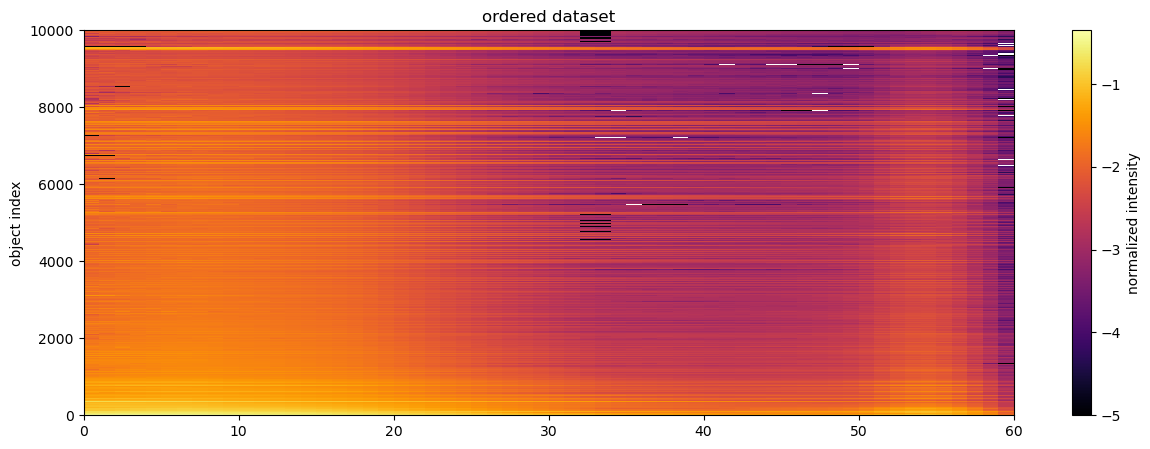

In [15]:
# plot the ordered dataset
reorder_raph = cull_raph[rows, :]

plt.figure(1, figsize=(15, 5))
plt.title("ordered dataset")
#plt.pcolormesh(rand_raph, cmap="inferno")
plt.pcolormesh(np.log10(reorder_raph), cmap="inferno")
plt.colorbar(label="normalized intensity")
plt.ylabel("x")
plt.ylabel("object index")